In [10]:
import json
import pandas as pd
import requests

stock = input("Enter the stock symbol: ")
print("The Stock we will look at is: " + stock)

apikey = "GbWvnL3oiH6BVVfCTVrL64tWzNmb4Yzvm5YJ9Uqg"

def get_stock_quote(stock, apikey):
    url = "https://yfapi.net/v6/finance/quote"
    querystring = {"symbols": stock}
    headers = {'x-api-key': apikey}
    response = requests.request("GET", url, headers=headers, params=querystring)
    stock_json = response.json()
    if 'quoteResponse' in stock_json and 'result' in stock_json['quoteResponse'] and len(stock_json['quoteResponse']['result']) > 0:
        result = stock_json['quoteResponse']['result'][0]
        company_name = result["longName"]
        market_price = result["regularMarketPrice"]
        fifty_two_week_high = result["fiftyTwoWeekHigh"]
        fifty_two_week_low = result["fiftyTwoWeekLow"]
        return {
            "Ticker": stock,
            "Company Name": company_name,
            "Current Market Price": market_price,
            "52-Week High": fifty_two_week_high,
            "52-Week Low": fifty_two_week_low
        }
    else:
        print("No data found for the given stock symbol.")
        return None

def get_financial_data(stock, apikey):
    url = f"https://yfapi.net/v11/finance/quoteSummary/{stock}?lang=en&region=US&modules=financialData"
    headers = {'x-api-key': apikey}
    response = requests.request("GET", url, headers=headers)
    financial_data = response.json()
    if 'quoteSummary' in financial_data and 'result' in financial_data['quoteSummary'] and len(financial_data['quoteSummary']['result']) > 0:
        target_mean_price = financial_data['quoteSummary']['result'][0]["financialData"]["targetMeanPrice"]["raw"]
        return target_mean_price
    else:
        print("No target mean price data found for the given stock symbol.")
        return None

def get_trending_stocks(apikey):
    url = "https://yfapi.net/v1/finance/trending/US"
    headers = {'x-api-key': apikey}
    response = requests.request("GET", url, headers=headers)
    trending_stocks = response.json()
    if 'finance' in trending_stocks and 'result' in trending_stocks['finance'] and len(trending_stocks['finance']['result']) > 0:
        quotes = trending_stocks['finance']['result'][0]['quotes']
        top_five_stocks = quotes[:5]
        return [stock['symbol'] for stock in top_five_stocks]
    else:
        print("No trending stocks data found.")
        return []

stock_data = get_stock_quote(stock, apikey)
if stock_data:
    target_mean_price = get_financial_data(stock, apikey)
    if target_mean_price:
        stock_data["Target Mean Price"] = target_mean_price

    df = pd.DataFrame([stock_data])
    df.to_csv("stock_data.csv", index=False)
    print("Stock data saved to stock_data.csv")

trending_stocks = get_trending_stocks(apikey)
if trending_stocks:
    print("Top 5 Trending Stocks:")
    for trending_stock in trending_stocks:
        print(trending_stock)


The Stock we will research is: abcdjh
No data found for the given stock symbol.
Top 5 Trending Stocks:
TSLA
NIO
IONQ
HOOD
RKLB


The Stock we will research is: AAPL


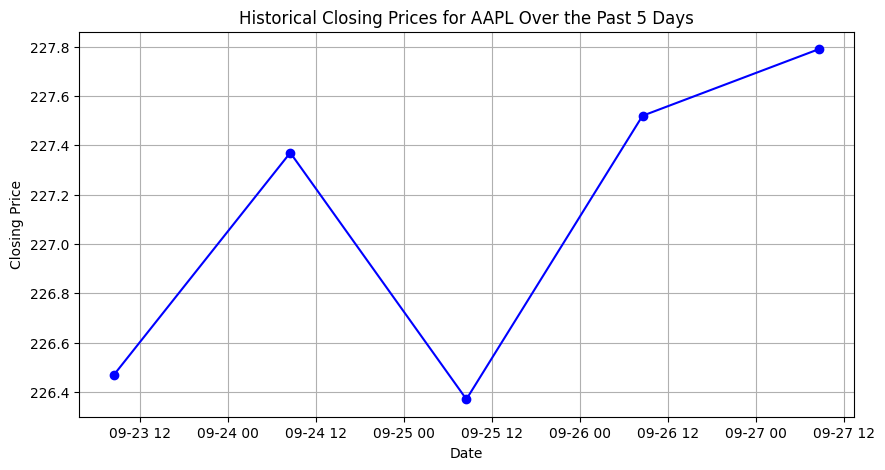

In [11]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from datetime import datetime

stock = input("Enter the stock symbol: ")
print("The Stock we will look at is: " + stock)

apikey = "GbWvnL3oiH6BVVfCTVrL64tWzNmb4Yzvm5YJ9Uqg"

def get_historical_data(stock, apikey):
    url = "https://yfapi.net/v8/finance/spark"
    querystring = {"interval": "1d", "range": "5d", "symbols": stock}
    headers = {'x-api-key': apikey}
    response = requests.request("GET", url, headers=headers, params=querystring)
    historical_data = response.json()
    if stock in historical_data:
        timestamps = historical_data[stock]['timestamp']
        close_prices = historical_data[stock]['close']
        dates = [datetime.fromtimestamp(ts) for ts in timestamps]
        return dates, close_prices
    else:
        print("No historical data found for the given stock symbol.")
        return [], []

def plot_historical_high_prices(dates, close_prices, stock):
    plt.figure(figsize=(10, 5))
    plt.plot(dates, close_prices, marker='o', linestyle='-', color='b')
    plt.title(f'Historical Closing Prices for {stock} Over the Past 5 Days')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.show()

dates, close_prices = get_historical_data(stock, apikey)
if dates and close_prices:
    plot_historical_high_prices(dates, close_prices, stock)
